In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
m_src=int(input('mean: '))
s_src=int(input('varience: '))

mean: 3
varience: 5


In [3]:
# Univariate gaussian data generator
def gaussian_data_generator(m,s):
  u=np.random.uniform(0,1)
  v=np.random.uniform(0,1)
  x=math.sqrt(-2*math.log(u))*math.cos(2*math.pi*v)
  return x*math.sqrt(s)+m
  
gaussian_data_generator(m_src,s_src)

0.7799414226374597

In [4]:
# Polynomial basis linear model data generator
b=int(input('b: '))
n_src=int(input('Basis number n: '))
a_src=int(input('a: '))
w=input('w: ')
w=w.split(',')

b: 1
Basis number n: 4
a: 1
w: 1,2,3,4


In [5]:
def polynomial_data_generator(n,a,w):
  W=np.zeros((n,1))
  x=np.random.uniform(-1,1)
  y=0
  for i in range(n):
    y+=int(w[i])*(x**i)
  e=gaussian_data_generator(0,a_src)
  return x,y+e


In [6]:
# 2.Sequential Estimator
print('Data point source function: N(%.1f,%.1f)'%(m_src,s_src))


M2_pre=mean_pre=0
# data=np.array([gaussian_data_generator(m,s)])
data=np.array([])
# Welford's online algorithm
while True:
  new_data=gaussian_data_generator(m_src,s_src)
  # mean_pre=sum(data)/len(data)
  data=np.append(data,np.array(new_data))
  print('Add data point: %f' % new_data)
  n=len(data)
  mean=sum(data)/n
  M2=M2_pre+(new_data-mean_pre)*(new_data-mean)
  print('Mean = %f Variance = %f' % (mean,M2/n))
  if abs(m_src-mean)<5e-2 and abs(M2/n-s_src)<5e-2:
    break
  M2_pre=M2
  mean_pre=mean

Data point source function: N(3.0,5.0)
Add data point: 5.375023
Mean = 5.375023 Variance = 0.000000
Add data point: 3.640603
Mean = 4.507813 Variance = 0.752053
Add data point: -0.597886
Mean = 2.805913 Variance = 6.294295
Add data point: 4.042208
Mean = 3.114987 Variance = 5.007301
Add data point: 3.029240
Mean = 3.097838 Variance = 4.007017
Add data point: 8.902037
Mean = 4.065204 Variance = 8.018171
Add data point: 5.366614
Mean = 4.251120 Variance = 7.080106
Add data point: 5.578740
Mean = 4.417072 Variance = 6.387874
Add data point: -0.910806
Mean = 3.825086 Variance = 8.481694
Add data point: 1.406012
Mean = 3.583179 Variance = 8.160197
Add data point: 4.300015
Mean = 3.648346 Variance = 7.460828
Add data point: 5.146719
Mean = 3.773210 Variance = 7.010595
Add data point: 4.304135
Mean = 3.814050 Variance = 6.491334
Add data point: 3.286573
Mean = 3.776373 Variance = 6.046121
Add data point: -1.710179
Mean = 3.410603 Variance = 7.516076
Add data point: 1.551922
Mean = 3.294436 Va

In [7]:
def plot_result(subplot,title,x,y,m,covarience,is_ground_truth=False):
  plt.subplot(subplot)
  plt.title(title)
  plt.xlim(-2.0, 2.0)
  plt.ylim(-20.0, 20.0)
  n=len(m)
  m=m.reshape(n)
  function = np.poly1d(np.flip(m))
  x_curve = np.linspace(-2.0, 2.0, 30)
  y_mean_curve = function(x_curve)
  plt.plot(x_curve, y_mean_curve, 'k') # mean curve

  if is_ground_truth:
    plt.plot(x_curve, y_mean_curve+a_src, 'r')
    plt.plot(x_curve, y_mean_curve-a_src, 'r')
  else:
    plt.scatter(x,y,s=10)  # data point
    y_curve_plus_var=[]
    y_curve_minus_var=[]
    for i in range(30):
      X=[[x_curve[i]**j for j in range(n)]]
      X=np.array(X)
      distance=1/a_src+X.dot(covarience).dot(X.T)[0][0]
      y_curve_plus_var.append(y_mean_curve[i]+distance)
      y_curve_minus_var.append(y_mean_curve[i]-distance)

    y_curve_plus_var=np.array(y_curve_plus_var).reshape(len(x_curve))
    y_curve_minus_var=np.array(y_curve_minus_var).reshape(len(x_curve))
    plt.plot(x_curve, y_curve_plus_var, 'r')
    plt.plot(x_curve, y_curve_minus_var, 'r')


In [8]:
# 3. Baysian Linear regression
X=[]
Y=[]
var_predict_pre=0
num=0
n=n_src
a=a_src
m_pre = np.zeros((n,1))
covarience=1/b*np.identity(n)

while True:
  num += 1
  var = 0
  new_x,new_y=polynomial_data_generator(n,a_src,w)
  X.append(new_x)
  Y.append(new_y)
  print(f'Add data point ({new_x:>.5f}, {new_y:>.5f}):\n')
        
  design_matrix = np.array([[new_x ** i for i in range(n)]])
  new_y = np.array([[new_y]])

  S=np.linalg.inv(covarience)
  covarience=np.linalg.inv(a*design_matrix.T.dot(design_matrix)+S)
  m=covarience.dot(a*design_matrix.T.dot(new_y)+S.dot(m_pre))

  m_predict = m.dot(design_matrix)
  var_predict = design_matrix.dot(covarience).dot(design_matrix.T) + (1 / a)

  print('Posterior mean:')
  print(m)
  
  print('\nPosterior variance:')
  print(covarience)
  
  print('\nPredictive distribution ~ N(%.5f , %.5f})'%(m_predict[0][0],var_predict[0][0]))
  print('--------------------------------------------------')
  
  if abs(var_predict_pre - var_predict) < 1e-4 and num >= 1000:
    break
  
  if num==10:
    X_10=X.copy()
    Y_10=Y.copy()
    m_10=m
    covarience_10=covarience
  
  if num==50:
    X_50=X.copy()
    Y_50=Y.copy()
    m_50=m
    covarience_50=covarience
  
  m_pre = m
  var_predict_pre = var_predict  


串流輸出內容已截斷至最後 5000 行。
[[ 3.23410933e-03  2.03124800e-05 -5.34199426e-03 -3.51192222e-05]
 [ 2.03124800e-05  2.50525368e-02 -3.97039173e-05 -3.46257786e-02]
 [-5.34199426e-03 -3.97039173e-05  1.60075859e-02  1.15438550e-04]
 [-3.51192222e-05 -3.46257786e-02  1.15438550e-04  5.78580425e-02]]

Predictive distribution ~ N(1.07035 , 1.00419})
--------------------------------------------------
Add data point (-0.08157, 0.87541):

Posterior mean:
[[1.07015922]
 [1.86750128]
 [2.82748164]
 [4.32801743]]

Posterior variance:
[[ 3.22392286e-03  2.67003021e-05 -5.32532240e-03 -4.39095417e-05]
 [ 2.67003021e-05  2.50485310e-02 -5.01586552e-05 -3.46202663e-02]
 [-5.32532240e-03 -5.01586552e-05  1.59802996e-02  1.29825376e-04]
 [-4.39095417e-05 -3.46202663e-02  1.29825376e-04  5.78504570e-02]]

Predictive distribution ~ N(1.07016 , 1.00331})
--------------------------------------------------
Add data point (-0.01986, 1.09760):

Posterior mean:
[[1.07036297]
 [1.86747152]
 [2.82714526]
 [4.32805812]]


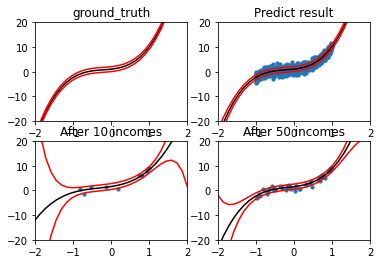

In [9]:
plot_result(221,'ground_truth',X,Y,m,covarience,True)
plot_result(222,'Predict result',X,Y,m,covarience)
plot_result(223,'After 10 incomes',X_10,Y_10,m_10,covarience_10)
plot_result(224,'After 50 incomes',X_50,Y_50,m_50,covarience_50)